<a href="https://colab.research.google.com/github/AlejandroZam/MeDIno/blob/main/pretraindinopill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11909167171423411534
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15349841920
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6352026393993255736
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [ ]:

!apt-get install python3.6
!pip3 install torch==1.7.1 torchvision==0.8.2 nvcc==11.0
!pip install timm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6 is already the newest version (3.6.9-1~18.04ubuntu1.7).
python3.6 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 776.8 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 51.0 MB/s 
ERROR: Could not find a version that satisfies the requirement nvcc==11.0 (from versions: none)
ERROR: No matching distribution found for nvcc==11.0
     |████████████████████████████████| 431 kB 15.5 MB/s 


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import sys
import os
import pandas as pd
import timm
import shutil
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
from PIL import Image


In [ ]:
vits16 = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
vits8 = torch.hub.load('facebookresearch/dino:main', 'dino_vits8')
vitb16 = torch.hub.load('facebookresearch/dino:main', 'dino_vitb16')
vitb8 = torch.hub.load('facebookresearch/dino:main', 'dino_vitb8')


Downloading: "https://github.com/facebookresearch/dino/archive/main.zip" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall16_pretrain.pth


  0%|          | 0.00/82.7M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth


  0%|          | 0.00/82.7M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_vitbase16_pretrain/dino_vitbase16_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_vitbase16_pretrain.pth


  0%|          | 0.00/327M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_vitbase8_pretrain/dino_vitbase8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_vitbase8_pretrain.pth


  0%|          | 0.00/327M [00:00<?, ?B/s]

In [ ]:
torch.hub.download_url_to_file('https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain_full_checkpoint.pth','content/')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rximageszip = '/content/drive/MyDrive/dataset/pillrximage.zip'

In [ ]:
!git clone https://github.com/facebookresearch/dino.git

Cloning into 'dino'...
remote: Enumerating objects: 168, done.
remote: Total 168 (delta 0), reused 0 (delta 0), pack-reused 168
Receiving objects: 100% (168/168), 24.44 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [ ]:
%cd /content

/content


In [ ]:
if not os.path.exists("pillrximagenet"):
  !unzip /content/drive/MyDrive/dataset/pillrximagenet.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/pillrximagenet/train/Prednisone_20/CQT_YB_U7VPTGQVPZO9FEPJ81B09FGB.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/CW_DEUGLOIW5PE2PHGQE0OR_7Y5TQK5.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/EQ8-3D039M4!EM4F0CM9RYGI!HCR9H.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/ES37O-NEL1CNUSW4!TGS-C8V5SBJXM.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/J-!FNGXUPZUXKPFH!50GG42ZNIQS6O.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/JJKBRPPDRSWUY73SMK8_JCKBICIDJP.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/NJ8!7_G28D5-125KCHAMWWZ9M12BJ6.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/R7BQL8K7TK8LPQ6DA!BDE-NADIRO-P.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/SD4FCLZ1M3LAHO8T9JJ_H_1OISZWXH.JPG  
  inflating: /content/pillrximagenet/train/Prednisone_20/TBJBH4V-KFXRDT5K!!GZSSSEA0NPHP.JPG  
  infla

In [ ]:
# !rm  /content/pillrximagenet/train/Etodolac_400/BBG7!QO6D!LX3V4J4WN_J!RS7_695ZO.JPG
# !rm /content/pillrximagenet/train/Glipizide_10/6OIQUPSL!MTTA70JALA9UGUS2K0P1A.JPG
# !rm /content/pillrximagenet/train/ropinirole_2/WLD5Q03RN7QT4UACRE2QWC0D5OL7MD.PNG
# !rm /content/pillrximagenet/train/ropinirole_2/B-8GYCMHPFP8!4UMC8JGLEKEM2K4NW0.PNG
# !rm /content/pillrximagenet/train/ropinirole_2/CYSA-JC3VDQ0-2AVXAJWY4RLKDH0JPD.JPG
# !rm /content/pillrximagenet/train/pantoprazole_20/B27FDKRV0W4W9EWN80EOSD8OQCE-BQK.JPG

In [ ]:
%cd dino/

/content/dino


In [ ]:
!python -m torch.distributed.launch --nproc_per_node=1 main_dino.py --out_dim=1024 --epochs 100 --batch_size_per_gpu 10 --arch vit_small --patch_size 8 --data_path /content/pillrximagenet/train --output_dir /content/drive/MyDrive/grad/medimagespring22/medino_vit_small_output

Streaming output truncated to the last 5000 lines.
Epoch: [67/100]  [ 830/1509]  eta: 0:06:24  loss: 0.224657 (0.179809)  lr: 0.000006 (0.000006)  wd: 0.314259 (0.312961)  time: 0.564609  data: 0.000155  max mem: 12900
Epoch: [67/100]  [ 840/1509]  eta: 0:06:18  loss: 0.159771 (0.179956)  lr: 0.000006 (0.000006)  wd: 0.314291 (0.312977)  time: 0.564580  data: 0.000155  max mem: 12900
Epoch: [67/100]  [ 850/1509]  eta: 0:06:13  loss: 0.123414 (0.178949)  lr: 0.000006 (0.000006)  wd: 0.314323 (0.312994)  time: 0.564784  data: 0.000153  max mem: 12900
Epoch: [67/100]  [ 860/1509]  eta: 0:06:07  loss: 0.108351 (0.178411)  lr: 0.000006 (0.000006)  wd: 0.314355 (0.313010)  time: 0.564680  data: 0.000150  max mem: 12900
Epoch: [67/100]  [ 870/1509]  eta: 0:06:01  loss: 0.130682 (0.178367)  lr: 0.000006 (0.000006)  wd: 0.314387 (0.313026)  time: 0.564499  data: 0.000150  max mem: 12900
Epoch: [67/100]  [ 880/1509]  eta: 0:05:56  loss: 0.124230 (0.177765)  lr: 0.000006 (0.000006)  wd: 0.314419 

In [ ]:
imagetest = Image.open('/content/pillrximagenet/val/Acetaminophen_325/50580-0496-60_NLMIMAGE10_FF03FFBF.jpg')
imagetest = imagetest.convert('RGB')

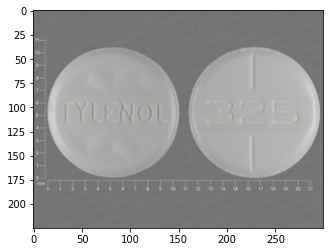

In [ ]:
plt.imshow(imagetest)

In [ ]:
imagetest = imagetest.resize((224,224))

In [ ]:
imagetest.save('/content/test.png')

In [ ]:
!python visualize_attention.py --image_path /content/test.png

Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_300ep_pretrain/dino_deitsmall8_300ep_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_300ep_pretrain.pth
100% 82.7M/82.7M [00:04<00:00, 20.2MB/s]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now 

In [ ]:
!python visualize_attention.py --pretrained_weights /content/drive/MyDrive/grad/medimagespring22/medino_vit_small_output/checkpoint.pth  --image_path /content/test.png

Take key teacher in provided checkpoint dict
Pretrained weights found at /content/drive/MyDrive/grad/medimagespring22/medino_vit_small_output/checkpoint.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor 

In [ ]:
shutil.copytree('/content/drive/MyDrive/grad/medimagespring22/meddinooutput','/content/output_dir/meddinooutput')

'/content/output_dir/meddinooutput'